# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## 1. Read in the file using pandas, and look at the first five rows

In [2]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25, na_values=["-"])


In [3]:
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns.str.replace("NaN", "")
df.head(2)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [5]:
df.head

<bound method NDFrame.head of         AD  Full-flowering date (DOY)  Full-flowering date  Source code  \
0      801                        NaN                  NaN          NaN   
1      802                        NaN                  NaN          NaN   
2      803                        NaN                  NaN          NaN   
3      804                        NaN                  NaN          NaN   
4      805                        NaN                  NaN          NaN   
5      806                        NaN                  NaN          NaN   
6      807                        NaN                  NaN          NaN   
7      808                        NaN                  NaN          NaN   
8      809                        NaN                  NaN          NaN   
9      810                        NaN                  NaN          NaN   
10     811                        NaN                  NaN          NaN   
11     812                       92.0                401.0          1.

In [6]:
df.shape

(1215, 6)

In [7]:
df.dtypes

AD                             int64
Full-flowering date (DOY)    float64
Full-flowering date          float64
Source code                  float64
Data type code               float64
Reference Name                object
dtype: object

## 3. Look at the final five rows of the data

In [8]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [9]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [10]:
df['Reference Name'].value_counts().head(1)

NEWS-PAPER(ARASHIYAMA)    94
Name: Reference Name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [11]:
df_new = df.dropna(subset=["Full-flowering date (DOY)"])
df_new

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU


## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

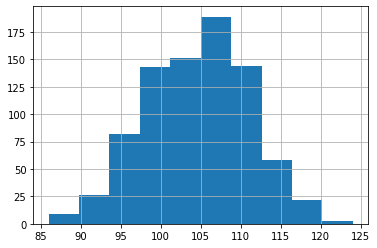

In [12]:
df_new["Full-flowering date (DOY)"].hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

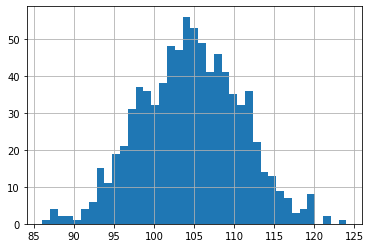

In [13]:
df_new["Full-flowering date (DOY)"].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [14]:
df_new["Full-flowering date (DOY)"].median()

105.0

In [15]:
df_new["Data type code"].sum()

1435.0

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [16]:
df_new[df_new.AD<1900]["Full-flowering date (DOY)"].mean()

105.20728291316527

## 11. How about after 1900?

In [17]:
df_new[df_new.AD>1900]["Full-flowering date (DOY)"].mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [18]:
df_new[df_new["Data type code"]== 4].count()



AD                           39
Full-flowering date (DOY)    39
Full-flowering date          39
Source code                  39
Data type code               39
Reference Name               39
dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [19]:
df_new[df_new["Data type code"]== 4]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU


## 14. Graph the full-flowering date (DOY) over time

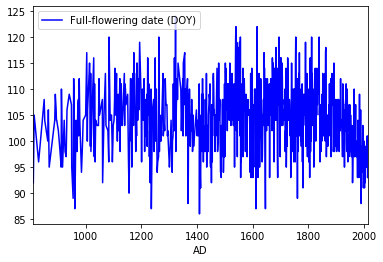

In [20]:
df_new.plot(x= "AD", y="Full-flowering date (DOY)", kind="line", color="blue")

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [21]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

In [22]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

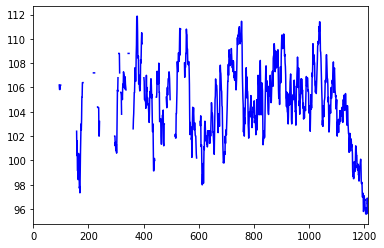

In [23]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean(). \
plot(x= "AD", y="Full-flowering date (DOY)", kind="line", color="blue")

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [24]:
df_new.columns

Index(['AD', 'Full-flowering date (DOY)', 'Full-flowering date', 'Source code',
       'Data type code', 'Reference Name'],
      dtype='object')

In [25]:
df_new['month'] = ''

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_new.loc[(df_new['Full-flowering date'] > 500,'month')] = 'May'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
df_new[df_new['Full-flowering date'] > 500]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month
522,1323,124.0,504.0,1.0,2.0,HANAZONOTENNO-SHINKI,May
739,1540,122.0,501.0,3.0,3.0,OYUDONONO-UENO-NIKKI [EDA],May
815,1616,122.0,501.0,4.0,2.0,YASUSHIGE-KYOKI,May


In [28]:
#df_new[df_new['Full-flowering date'] < 400]
#df_new.loc[(df_new['Full-flowering date'] > 400,'month')] = 'April'

In [29]:
df_new.loc[(df_new['Full-flowering date'] > 400) & (df_new['Full-flowering date']<500),'month'] = 'April'

In [30]:
df_new.loc[(df_new['Full-flowering date'] < 400) & (df_new['Full-flowering date'] > 300),'month'] = 'March'


In [31]:
df_new[df_new['Full-flowering date'] < 400]

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month
154,955,89.0,330.0,5.0,4.0,SHUISHO,March
160,961,87.0,328.0,1.0,2.0,NIHONKIRYAKU,March
355,1156,90.0,330.0,2.0,2.0,NaN,March
435,1236,87.0,327.0,7.0,4.0,SHIIBA-WAKASHU,March
567,1368,88.0,328.0,3.0,1.0,GUKANKI,March
608,1409,86.0,327.0,4.0,2.0,(DAINIHON-SHIRYO),March
811,1612,87.0,327.0,1.0,1.0,GIENJUNKO-NIKKI(DAIGO),March
845,1646,87.0,328.0,4.0,2.0,SHOHO-2-NEN-IKO-NIKKI,March
960,1761,89.0,330.0,4.0,2.0,MYOHOIN-HINAMIKI,March
1189,1990,88.0,329.0,3.0,0.0,NEWS-PAPER(ARASHIYAMA),March


In [32]:
df_new

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,April
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,April
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,April
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,April
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,April
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU,April
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU,April
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,April


### 17. Using your new column, how many blossomings happened in each month?

In [33]:
#All months
df_new.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

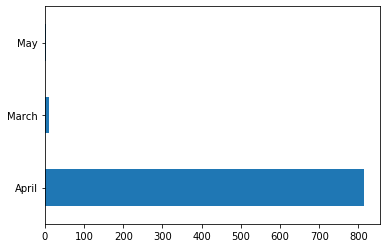

In [34]:
df_new.month.value_counts().plot(kind='barh')

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

In [35]:
df_new

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,April
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,April
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,April
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,April
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,April
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU,April
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU,April
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,April


And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [48]:
df_new['Full-flowering date'].dropna().astype(int).head()

11    401
14    415
30    406
50    418
52    414
Name: Full-flowering date, dtype: int64

In [37]:
#df['month_num'] = df['Full-flowering date'].dropna()\
#.astype(int).astype(str).apply(lambda value: value[0])

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [49]:
df_new['Full-flowering date'].dropna()\
.astype(int).astype(str).apply(lambda value: value[1:3]).head()

11    01
14    15
30    06
50    18
52    14
Name: Full-flowering date, dtype: object

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [50]:
df_new['day-of-month'] = df_new['Full-flowering date'].dropna()\
.astype(int).astype(str).apply(lambda value: value[1:3])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
df_new.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month,day-of-month
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,09
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,03
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,04
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,03


### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

In [52]:
df_new["date"]= df_new["month"] + " " + df_new["day-of-month"]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
df_new.dtypes

AD                             int64
Full-flowering date (DOY)    float64
Full-flowering date          float64
Source code                  float64
Data type code               float64
Reference Name                object
month                         object
day-of-month                  object
date                          object
dtype: object

In [54]:
df_new.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month,day-of-month,date
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,09,April 09
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,10,April 10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,03,April 03
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,04,April 04
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),April,03,April 03


# YOU ARE DONE.

And **incredible.**